In [93]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.naive_bayes import GaussianNB


In [94]:
data=pd.read_csv("UnivBank.csv")
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [95]:
data.shape

(5000, 14)

In [96]:
data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [97]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [98]:
data['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

In [99]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [100]:
data['Experience'].replace([-1,-2,-3],[1,2,3],inplace=True)

In [101]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [102]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [103]:
data1=data[['Age','Experience','Income','Family','CCAvg','Education','Personal Loan']]

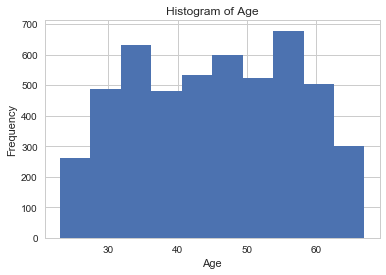

In [104]:
data.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

In [105]:
data_final_vars=data1.columns.values.tolist()
y=data1['Personal Loan']
Z=[i for i in data_final_vars if i not in y]
X=data1[Z]

In [106]:
y=data1['Personal Loan']
X=data1[['Age','Experience','Income','Family','CCAvg','Education']]

In [107]:
data_final_vars

['Age',
 'Experience',
 'Income',
 'Family',
 'CCAvg',
 'Education',
 'Personal Loan']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [109]:
y_pred = logreg.predict(X_test)

In [110]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


In [111]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.940


In [112]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1352   20]
 [  54   74]]


In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97      1372
          1       0.79      0.58      0.67       128

avg / total       0.95      0.95      0.95      1500



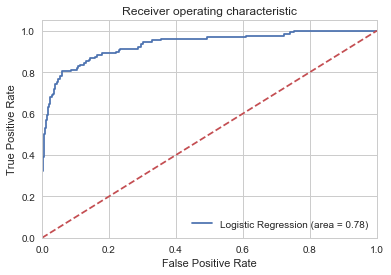

In [114]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Accuracy is  93.13333333333334 % for K-Value: 2
Accuracy is  93.33333333333333 % for K-Value: 3
Accuracy is  92.53333333333333 % for K-Value: 4
Accuracy is  92.80000000000001 % for K-Value: 5
Accuracy is  92.86666666666666 % for K-Value: 6
Accuracy is  92.73333333333333 % for K-Value: 7
Accuracy is  92.80000000000001 % for K-Value: 8
Accuracy is  92.13333333333334 % for K-Value: 9
Accuracy is  92.66666666666666 % for K-Value: 10


([<matplotlib.axis.XTick at 0x1ed96513da0>,
 <a list of 6 Text xticklabel objects>)

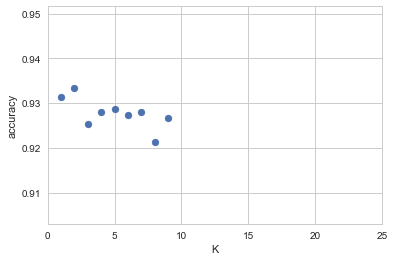

In [115]:

k_range = range(1, 10)
scores = []
for K in k_range:
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    print ("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)
    
    scores.append(neigh.score(X_test, y_test))
plt.figure()
plt.xlabel('K')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25])

In [119]:
k_range = range(1, 10)
scores = []
for K in k_range:
    K_value = K+1
    neigh1 = KNeighborsRegressor(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh1.fit(X_train, y_train) 
    y_pred1 = neigh1.predict(X_test)
    print ("Accuracy is ", accuracy_score(y_test,y_pred1.round())*100,"% for K-Value:",K_value)

Accuracy is  93.13333333333334 % for K-Value: 2
Accuracy is  93.33333333333333 % for K-Value: 3
Accuracy is  92.53333333333333 % for K-Value: 4
Accuracy is  92.80000000000001 % for K-Value: 5
Accuracy is  92.86666666666666 % for K-Value: 6
Accuracy is  92.73333333333333 % for K-Value: 7
Accuracy is  92.80000000000001 % for K-Value: 8
Accuracy is  92.13333333333334 % for K-Value: 9
Accuracy is  92.66666666666666 % for K-Value: 10


Accuracy is  95.37142857142857 % for K-Value: 2
Accuracy is  96.0 % for K-Value: 3
Accuracy is  94.22857142857143 % for K-Value: 4
Accuracy is  94.45714285714286 % for K-Value: 5
Accuracy is  93.37142857142857 % for K-Value: 6
Accuracy is  93.82857142857142 % for K-Value: 7
Accuracy is  92.80000000000001 % for K-Value: 8
Accuracy is  93.05714285714286 % for K-Value: 9
Accuracy is  92.42857142857143 % for K-Value: 10


([<matplotlib.axis.XTick at 0x1ed96588cf8>,
 <a list of 6 Text xticklabel objects>)

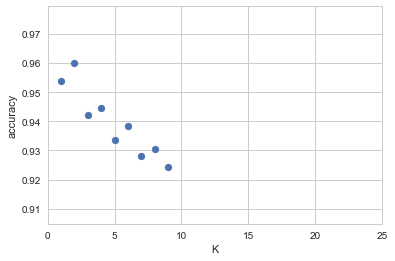

In [121]:

k_range = range(1, 10)
scores = []
for K in k_range:
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X_train, y_train) 
    y_predt = neigh.predict(X_train)
    print ("Accuracy is ", accuracy_score(y_train,y_predt)*100,"% for K-Value:",K_value)
    
    scores.append(neigh.score(X_train, y_train))
plt.figure()
plt.xlabel('K')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25])

In [120]:
k_range = range(1, 10)
scores = []
for K in k_range:
    K_value = K+1
    neigh1 = KNeighborsRegressor(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh1.fit(X_train, y_train) 
    y_pred1 = neigh1.predict(X_train)
    print ("Accuracy is ", accuracy_score(y_train,y_pred1.round())*100,"% for K-Value:",K_value)

Accuracy is  95.37142857142857 % for K-Value: 2
Accuracy is  96.0 % for K-Value: 3
Accuracy is  94.22857142857143 % for K-Value: 4
Accuracy is  94.45714285714286 % for K-Value: 5
Accuracy is  93.37142857142857 % for K-Value: 6
Accuracy is  93.82857142857142 % for K-Value: 7
Accuracy is  92.80000000000001 % for K-Value: 8
Accuracy is  93.05714285714286 % for K-Value: 9
Accuracy is  92.42857142857143 % for K-Value: 10


In [82]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [83]:
accuracy_score(y_test,y_pred, normalize = True)

0.918

In [85]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [86]:
data3=data[['Age','Experience','Income','Family','CCAvg','Education','CreditCard']]

In [87]:
y1=data3['CreditCard']
X1=data3[['Age','Experience','Income','Family','CCAvg','Education']]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [90]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [91]:
accuracy_score(y_test,y_pred, normalize = True)

0.7033333333333334